<a href="https://colab.research.google.com/github/makhmudovamunira/DataScience_Mohirdev/blob/main/DL_SemanticSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai

In [ ]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

## Semantic Segmentation

### O'zi yurar avtomabillar uchun juda ham muhim bo'lgan rasmdagi turli xil obyektlarni ajrata olish (`semantic segmentation`) texnologiyasini modelini qurib ko'ramiz. Ya'ni modelimiz rasmdagi turli xil obyeklarni ajratib ularni turli xil ranglarda ko'rsatadi.

Buning uchun biz `Semantic object classes in video: A high-definition ground truth database` ilmiy maqolada qo'llanilgan datasetdan foydalanamiz.

### Yanada yaxshiroq tasavvurga ega bo'lish uchun quyidagi rasmga e'tibor bering.

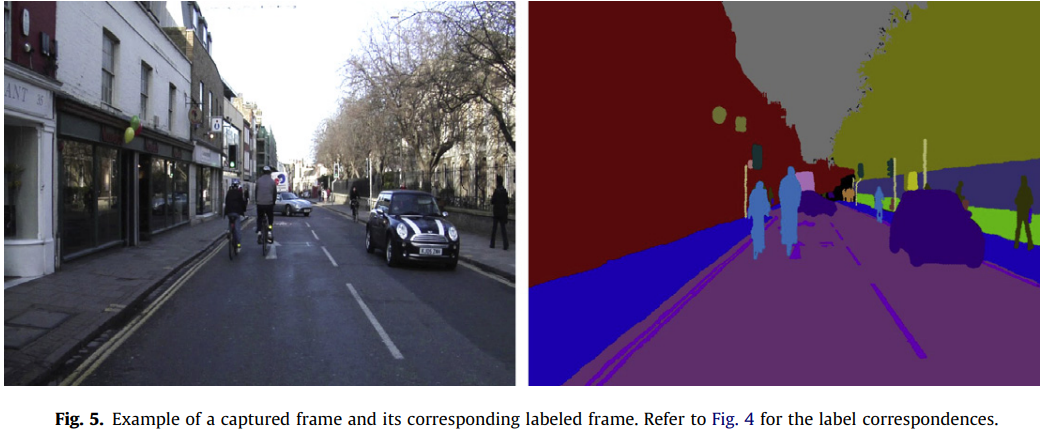

In [ ]:
from fastai.vision.all import *
import numpy as np

path=untar_data(URLs.CAMVID_TINY)

#label getter funksiya
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'


#dataloaders
dls=SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'), label_func=label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))

#fine- tuning
learn=unet_learner(dls, resnet34)
learn.fine_tune(12)

In [ ]:
learn.show_results(max_n=5, figsize=(15,16))